<a href="https://colab.research.google.com/github/maarsottile/ProyectoDSParteI-Sottile-v2/blob/main/ProyectoParteIII%2BSottile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

# **PARTE I**

**Abstract**

El presente proyecto tiene como finalidad realizar un análisis exploratorio de datos (EDA) sobre un conjunto de información correspondiente al mercado de autos usados, con el objetivo de identificar los factores que más inciden en el precio de venta. El dataset utilizado, Used Car Price Prediction, contiene miles de registros con variables tales como año de fabricación, kilometraje recorrido, cantidad de propietarios previos, tipo de combustible, marca, modelo, cotización del corredor, cantidad de visualizaciones y precio final. A partir de estos datos, se busca obtener una comprensión inicial del comportamiento del mercado, identificar patrones y establecer hipótesis que permitan, en etapas posteriores, desarrollar modelos predictivos de valuación.

La relevancia del estudio radica en que, en la actualidad, las plataformas digitales de compra y venta de autos, las aseguradoras y las concesionarias utilizan cada vez más modelos analíticos para definir precios competitivos. Por ello, comprender la estructura interna de los datos es clave antes de aplicar cualquier técnica predictiva. El presente análisis servirá como punto de partida para evaluar cómo variables como la antigüedad del vehículo, el kilometraje o el tipo de combustible afectan su valor de reventa. A través de este EDA se pretende obtener conclusiones preliminares que orienten futuras etapas del proyecto, enfocado en la predicción de precios y la toma de decisiones comerciales informadas.

**Contexto Comercial y Analítico**

El mercado de autos usados representa un segmento dinámico y competitivo dentro del sector automotor, donde los precios fluctúan según múltiples factores técnicos y de percepción. Desde el punto de vista comercial, este análisis busca aportar información útil para concesionarias, corredores y plataformas online que necesitan ajustar sus estrategias de compra, publicación y venta en función del comportamiento real del mercado. Identificar qué variables tienen mayor peso sobre el precio permite diseñar políticas de valuación más precisas y ofrecer recomendaciones personalizadas a los clientes.

Desde el punto de vista analítico, el proyecto combina exploración estadística y visualización para comprender las interrelaciones entre variables y detectar posibles patrones ocultos. Este diagnóstico inicial no sólo ayuda a limpiar y estructurar la base de datos, sino que sienta las bases para la construcción de modelos predictivos robustos en etapas posteriores del proyecto. En síntesis, la conjunción entre análisis de negocio y análisis de datos busca traducir información cruda en conocimiento accionable.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**


*Preguntas*
1. ¿Qué diferencias se observan en los precios entre distintos tipos de combustible o transmisiones?
2. ¿Influye el número de propietarios anteriores en el valor final de un vehículo?
3. ¿Cómo se relacionan las visualizaciones del vehículo (popularidad) con el precio final?


*Hipótesis*
- H1: Los vehículos más nuevos presentan precios promedio más altos.
- H2: A mayor kilometraje, menor valor de venta promedio.
- H3: Los autos con combustible diésel mantienen un valor superior frente a los nafteros.
- H4: Un mayor número de propietarios reduce el precio final del vehículo.

# Lectura de datos

**Librerias necesarias para el analisis de datos**

In [106]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Lectura del dataset**

In [107]:
df = pd.read_csv("https://raw.githubusercontent.com/maarsottile/ProyectoDSParteI-Sottile-v2/refs/heads/main/Used_Car_Price_Prediction.csv")
df

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,honda amaze,2018,diesel,53486,604299,ghaziabad,2756,sedan,NaN,1.5 v cvt i-dtec,...,1,630810,787750.0,great,2021-02-07T08:05:30.443,True,14036,90645,True,False
7396,maruti ignis,2018,petrol,8854,562599,chennai,640,hatchback,manual,delta 1.2 k12,...,1,549440,NaN,great,2021-03-31T10:21:56.289,True,13068,84390,False,False
7397,honda amaze,2015,petrol,46300,400499,pune,795,sedan,manual,1.2 smt i vtec,...,1,383419,NaN,great,2021-03-04T12:40:38.652,True,9303,60075,True,False
7398,maruti alto k10,2016,petrol,27245,284099,new delhi,1155,hatchback,manual,lxi,...,1,286515,369885.0,great,2021-03-16T13:31:39.766,True,6599,42615,False,False


**Análisis inicial del dataset**

**Descripción de variables**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [109]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


In [110]:
df.shape

(7400, 29)

# Data Wrangling - Limpieza y transformación de datos

**Valores duplicados**

In [111]:
# Mostrar filas duplicadas
duplicados = df[df.duplicated()]
print(f"Cantidad de filas duplicadas: {duplicados.shape[0]}")
duplicados.head() # mostrar las primeras filas duplicadas

Cantidad de filas duplicadas: 1


,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
7399,mahindra thar,2017,diesel,37134,671399,new delhi,4603,suv,manual,crde 4x4 bs iv,...,1,646565,NaN,great,2021-03-07T10:10:19.937,True,15595,100710,True,False


In [112]:
# Eliminar filas duplicadas (dejando solo la primera aparición)
df = df.drop_duplicates()

In [113]:
# Verificar que se eliminaron
duplicados = df[df.duplicated()]
print(f"Cantidad de filas duplicadas: {duplicados.shape[0]}")

Cantidad de filas duplicadas: 0


In [114]:
df = df.copy()

**Valores nulos**

In [115]:
#Chequeo de Nulos
df.isnull().sum()

,0
car_name,0
yr_mfr,0
fuel_type,0
kms_run,0
sale_price,0
city,0
times_viewed,0
body_type,103
transmission,556
variant,0


*Análisis de los nulos*

In [116]:
#Filtro por Forma de auto
df[df['body_type'].isnull()]

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
174,maruti new wagon-r,2019,petrol,21000,397699,noida,2197,NaN,NaN,lxi 1.0 l,...,1,397608,399108.0,great,2021-02-17T11:11:35.369,True,9238,59655,True,False
266,maruti 800,2005,petrol,58000,35,noida,661,NaN,NaN,dx,...,2,0,NaN,NaN,2020-10-23T07:04:48.262,False,1,6,False,False
345,kia seltos,2020,diesel,20199,1399656,gurgaon,7280,NaN,NaN,htx 1.5 diesel,...,1,1477500,1483500.0,great,2021-03-12T07:10:52.11,True,32511,209949,False,False
468,maruti new wagon-r,2020,petrol,6003,434699,gurgaon,6794,NaN,NaN,lxi 1.0 l,...,1,427106,518133.0,great,2021-03-14T13:35:01.316,True,10097,65205,True,False
563,renault captur,2017,diesel,48000,600000,gurgaon,304,NaN,NaN,1.5 platine diesel,...,1,0,NaN,good,NaN,True,13937,90000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,kia seltos,2019,petrol,6243,1041510,chennai,6590,NaN,NaN,htk 1.5 petrol,...,1,1040000,1203840.0,great,2021-03-19T12:43:12.462,True,24192,156227,False,False
7150,honda city zx,2006,petrol,53377,100000,lucknow,194,NaN,NaN,1.5 exi,...,5,18000,NaN,overpriced,2019-08-24T09:15:15.601,False,2323,15000,False,False
7240,hyundai new santro,2019,petrol,13427,500199,lucknow,2870,NaN,NaN,sportz 1.1,...,1,499880,608546.0,great,2021-03-21T13:05:54.986,True,11618,75030,False,False
7287,mg hector,2019,petrol,83351,1477426,gurgaon,1328,NaN,NaN,sharp dct petrol,...,1,1526327,1784772.0,great,2021-04-03T08:26:43.772,True,34317,221614,False,False


In [117]:
#Variables categóricas

#Transformación y Reemplazo de Nulos por un valor
df['body_type'] = df['body_type'].fillna('s/categ')

#Continuo con el resto de las categorías
df['transmission'] = df['transmission'].fillna('s/categ')
df['source'] = df['source'].fillna('s/categ')
df['car_rating'] = df['car_rating'].fillna('s/categ')


# car_availability es una variable categoríca, pero en este caso voy a suponer que si tiene valor nulo es que no esta en stock
df['car_availability'] = df['car_availability'].fillna('out_of_stock')

# fitness_certificate es una variable categórica, pero en este caso voy a suponer que si tiene valor nulo es que no tiene este certificado, por lo tanto es Falso
df['fitness_certificate'] = df['fitness_certificate'].fillna('FALSE')

# registered_city	- registered_state - car_rating para estos casos los nulos los clasificaré como sin información (S/Info)
df['registered_city'] = df['registered_city'].fillna('s/info')
df['registered_state'] = df['registered_state'].fillna('s/info')
df['car_rating'] = df['car_rating'].fillna('s/info')

In [118]:
# ad_created_on	es la fecha de creación del registro, y es una sola fecha faltante, como no es de vital importancia usaré la moda
df['ad_created_on'].fillna(df['ad_created_on'].mode()[0])

,ad_created_on
0,2021-04-04T07:09:18.583
1,2021-03-22T14:07:32.833
2,2021-03-20T05:36:31.311
3,2021-01-21T12:59:19.299
4,2021-04-01T13:33:40.733
...,...
7394,2019-12-31T16:07:01.563
7395,2021-02-07T08:05:30.443
7396,2021-03-31T10:21:56.289
7397,2021-03-04T12:40:38.652


In [119]:
#original_price es una variable numérica, en este caso para los que no tienen información decido ponerle 0
df['original_price'] = df['original_price'].fillna(0)

In [120]:
#Re-chequeo de Nulos
df.isnull().sum()

,0
car_name,0
yr_mfr,0
fuel_type,0
kms_run,0
sale_price,0
city,0
times_viewed,0
body_type,0
transmission,0
variant,0


**Tratamiento de valores outliers**

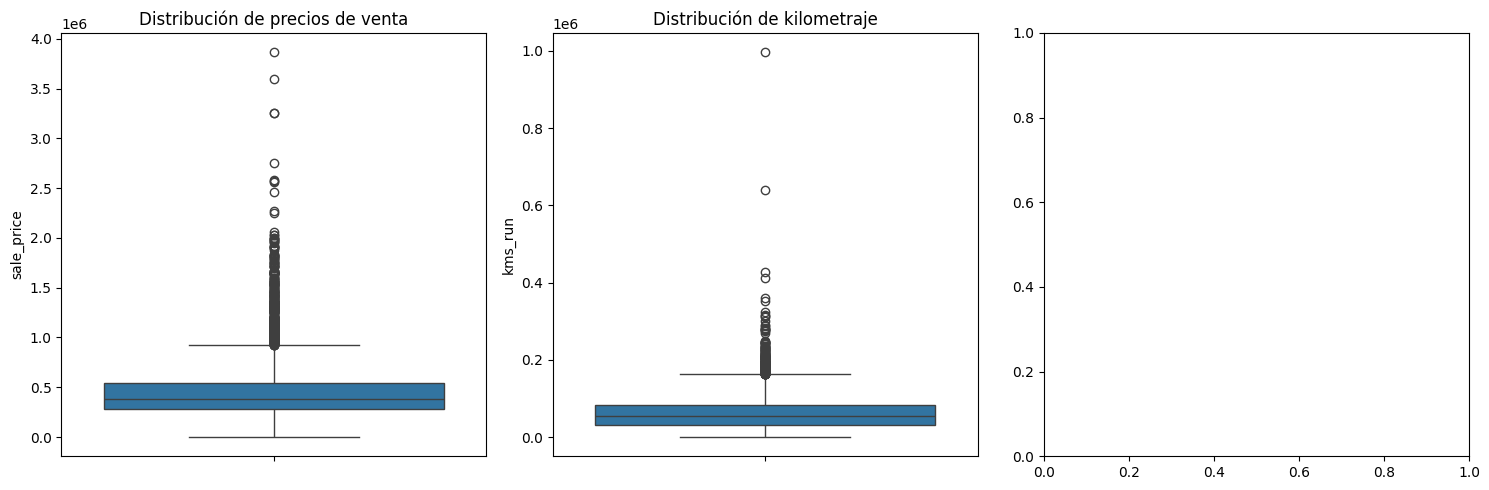

In [121]:
# Visualización de outliers con boxplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df['sale_price'], ax=ax[0])
ax[0].set_title('Distribución de precios de venta')

sns.boxplot(y=df['kms_run'], ax=ax[1])
ax[1].set_title('Distribución de kilometraje')

plt.tight_layout()
plt.show()

In [122]:
#En el caso de sale_price vemos varios valores extremos, pero es normal en tema de compra y ventas de autos por las diferentes marcas y modelos, pero si podemos evaluar si hay precios muy bajos que relamente si entorpezcan la base, por eso haré lo siguiente:

p1 = df['sale_price'].quantile(0.01)

#Nuevo df que solo incluye las filas donde el precio de venta es estrictamente mayor que el valor del percentil 1 (p1).
df = df[df['sale_price'] > p1]

In [123]:
df.shape

(7324, 29)

Se observan valores atípicos en sale_price y kms_run. Sin embargo, dado el contexto comercial del dataset (vehículos de diferentes gamas y antigüedades), estos valores extremos representan, en su mayoría, casos reales y no errores de carga. Por ello, se decidió mantener a la mayoría para no distorsionar la distribución natural del mercado

# Análisis Exploratorio de datos

**Análisis univariado**

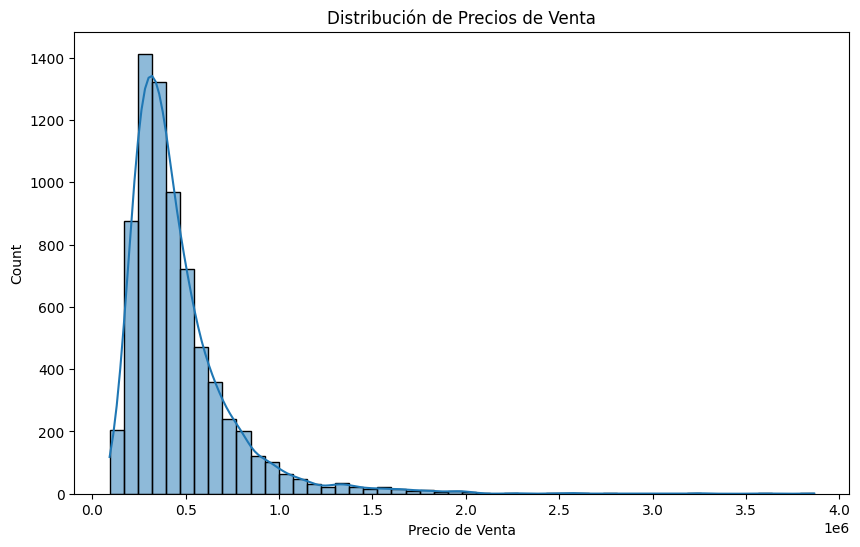

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], kde=True, bins=50)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.show()

Muestra una distribucíon sesgada a la derecha (más autos baratos que caros). La mayoría de los autos usados en este dataset se venden en el rango de precios más bajo, y solo una pequeña parte de autos son "de lujo" o tienen precios muy altos, los valores que se extienden hasta el final de la cola, dada la extensión de la cola estos valores se podría tomar como outliers, pero en este caso para este tipo de bien puede suceder estas variaciones.

**Análisis bivariado**

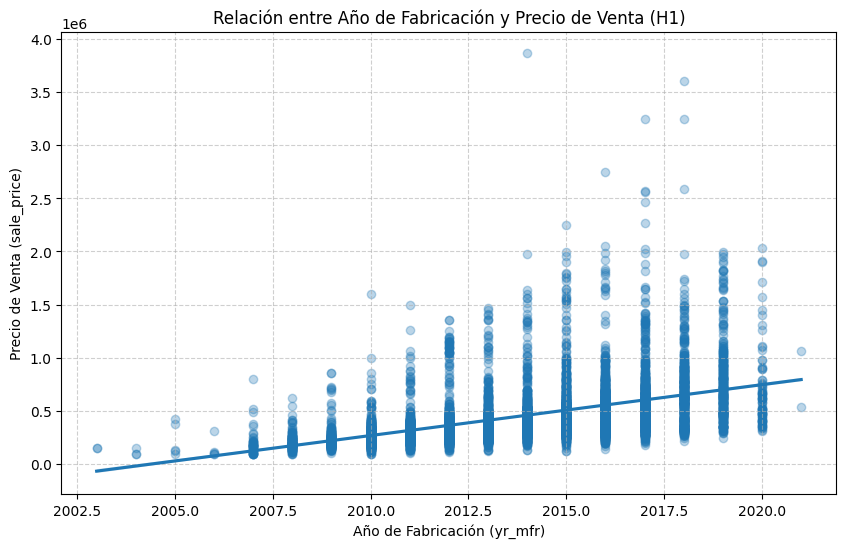

Correlación entre Año y Precio: 0.51


In [125]:
# Gráfico de dispersión para corroborar H1
plt.figure(figsize=(10, 6))
sns.regplot(x='yr_mfr', y='sale_price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre Año de Fabricación y Precio de Venta (H1)')
plt.xlabel('Año de Fabricación (yr_mfr)')
plt.ylabel('Precio de Venta (sale_price)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Correlación
correlacion_yr_price = df['yr_mfr'].corr(df['sale_price'])
print(f"Correlación entre Año y Precio: {correlacion_yr_price:.2f}")

Como la correlación es positiva y la línea asciende, la hipótesis H1: Los vehículos más nuevos presentan precios promedio más altos, se *cumple*

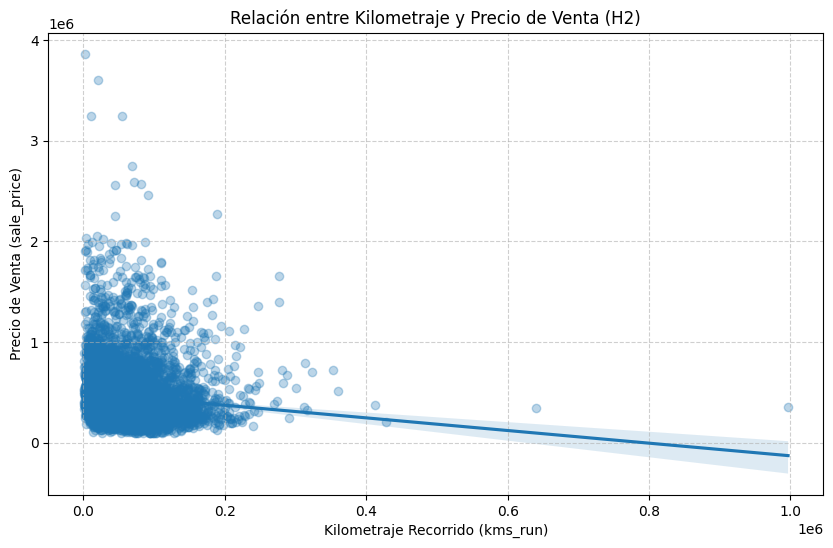

Correlación entre Kilometraje y Precio: -0.10


In [126]:
# Gráfico de dispersión para corroborar H2
plt.figure(figsize=(10, 6))
# Se usa 'logx=True' para suavizar la dispersión si los kms_run tienen mucha variación
sns.regplot(x='kms_run', y='sale_price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre Kilometraje y Precio de Venta (H2)')
plt.xlabel('Kilometraje Recorrido (kms_run)')
plt.ylabel('Precio de Venta (sale_price)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Correlación
correlacion_kms_price = df['kms_run'].corr(df['sale_price'])
print(f"Correlación entre Kilometraje y Precio: {correlacion_kms_price:.2f}")

Como la correlación la correlación es negativa y la línea desciende, la hipótesis H2: A mayor kilometraje, menor valor de venta promedio, se cumple

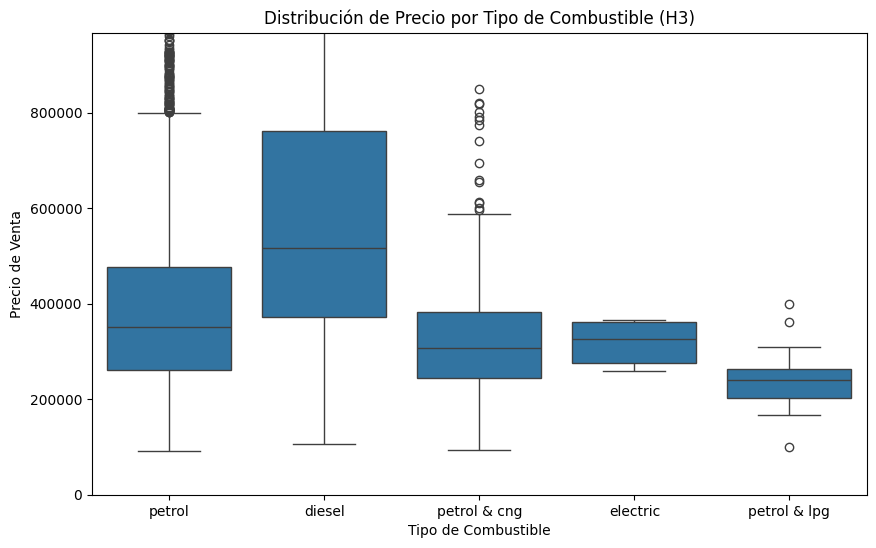

In [127]:
#Boxplot para corroborar H3
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='sale_price', data=df)
plt.title('Distribución de Precio por Tipo de Combustible (H3)')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.ylim(0, df['sale_price'].quantile(0.95)) # Limito Y para una mejor visualización
plt.show()

In [128]:
medianas_combustible = df.groupby('fuel_type')['sale_price'].median().sort_values(ascending=False) #Uso la mediana en lugar de la media para evitar que los valores muy extremos de precios distorsionen la comparación.
print("Mediana del Precio de Venta por Tipo de Combustible:")
print(medianas_combustible)

Mediana del Precio de Venta por Tipo de Combustible:
fuel_type
diesel          516899.0
petrol          352299.0
electric        327099.5
petrol & cng    307999.0
petrol & lpg    239299.0
Name: sale_price, dtype: float64


Segun esta visualización se puede ver que los autos con combustible diésel mantienen un valor superior frente al resto de autos con otro tipo de combustible, confirmand la H3.

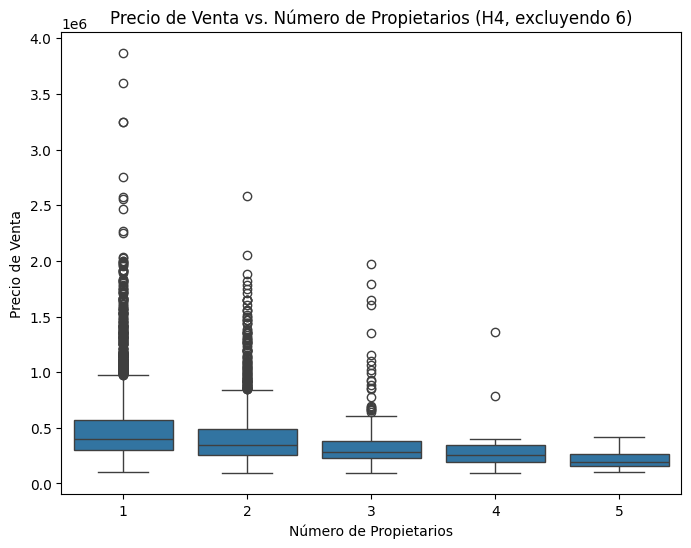

In [129]:
#Boxplot para corroborar H4
# Voy a crear un DataFrame que excluye todas las filas donde total_owners es 6, dado que al memento de graficar este dato genera ruido en el analisis final de esta hipótesis.
df_filtrado_6 = df[df['total_owners'] < 6].copy()

# BoxPlot con el DataFrame filtrado.
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_owners', y='sale_price', data=df_filtrado_6)
plt.title('Precio de Venta vs. Número de Propietarios (H4, excluyendo 6)')
plt.xlabel('Número de Propietarios')
plt.ylabel('Precio de Venta')
plt.show()

La mediana del precio va decreciendo a medida que el número de propietarios aumenta dando por confirmada la H4: Un mayor número de propietarios reduce el precio final del vehículo.

**Análisis multivariado**

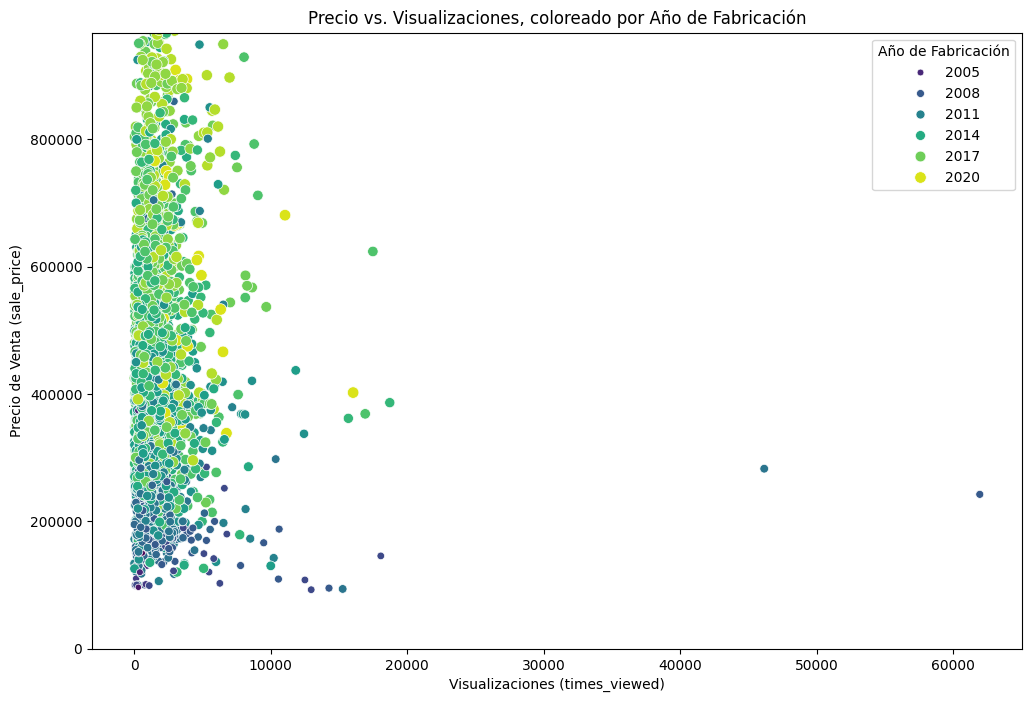

In [130]:
# Scatter Plot con colores (3 variables: Vistas vs. Precio vs. Año)
plt.figure(figsize=(12, 8))
# El color representa el año, mostrando la antigüedad.
sns.scatterplot(x='times_viewed', y='sale_price', hue='yr_mfr', size='yr_mfr',
                palette='viridis', data=df.sample(frac=0.5, random_state=42))

plt.title('Precio vs. Visualizaciones, coloreado por Año de Fabricación')
plt.xlabel('Visualizaciones (times_viewed)')
plt.ylabel('Precio de Venta (sale_price)')
plt.legend(title='Año de Fabricación')
plt.ylim(0, df['sale_price'].quantile(0.95))
plt.show()

Se puede ver que los autos con más vistas no tienen precios más altos (rechazando la popularidad), se observa que los precios altos son impulsados mayormente por autos nuevos (los de color más claro)

# Conclusiones del EDA

**1. Hallazgos sobre la Variable Objetivo: Precio de Venta**

La distribución del Precio de Venta está fuertemente sesgada a la derecha, con la mayoría de las transacciones concentradas en el rango de precios bajo a moderado.


**2. Evaluación de Hipótesis**

- H1: Autos más nuevos tienen precios promedio más altos: Confirmada. Se observó una clara correlación positiva entre el yr_mfr y sale_price.
- H2: A mayor kilometraje, menor valor de venta: Confirmada.Se pudo ver una correlación negativa entre kms_run y sale_price.
- H3: Diésel mantienen valor superior: Confirmada. El Diésel se posiciona como el tipo de combustible con la mediana de precio más alta en el mercado de usados, superando significativamente al resto de los tipos de combstible.
- H4: Mayor número de propietarios reduce el precio: Confirmada. Se identificó una tendencia decreciente en el precio mediano a medida que aumenta el total_owners, demostrando que la cantidad de propietarios afecta negativamente el valor de reventa.

En conclusión, los datos confirman que la depreciación es una función primaria de la antigüedad y el kilometraje, con el tipo de combustible (Diésel) y el número de propietarios actuando como mediadores significativos del valor final. El siguiente paso será la preparación avanzada de features y la construcción de los primeros modelos predictivos.

# **PARTE II**

En esta segunda etapa del proyecto se continúa el trabajo iniciado en la fase exploratoria y de limpieza de datos, avanzando hacia la construcción de un modelo predictivo capaz de estimar el precio de venta de vehículos usados. Para ello, se aplican técnicas de reducción de dimensionalidad, codificación de variables categóricas, entrenamiento de un modelo basado en árboles y evaluación mediante métricas de regresión.

El objetivo principal es identificar cuáles son las variables que aportan mayor valor predictivo, entrenar un algoritmo robusto y evaluar su desempeño en relación con las variaciones reales del precio. Esta etapa se basa en los datos ya depurados en la entrega anterior, asegurando que el modelo se entrene sobre un dataset consistente y representativo.

**Hipótesis de Modelado**

**H1:** El año, el odómetro y ciertas características del vehículo (body_type, estado, transmisión) aportan el mayor poder predictivo al modelo.  

**H2:** La reducción de dimensionalidad mediante técnicas basadas en modelos mejora la estabilidad y capacidad predictiva del algoritmo.  

**H3:** Un modelo basado en árboles, como Random Forest, será capaz de capturar relaciones no lineales entre variables y generar un desempeño sólido sin requerir un tuning exhaustivo.

**Preparación del Dataset + One-Hot Encoding**

Es necesario preparar las variables para su uso en modelos de machine learning.

Dado que varios atributos del dataset son categóricos y que varios algoritmos no aceptan variables categóricas en formato texto, se aplica One-Hot Encoding, transformando las categorías en variables binarias. Esto incrementa el número de columnas, pero permite que el modelo lea correctamente la información. Además, se utiliza `drop_first=True` para evitar multicolinealidad.

Además, se separa la variable objetivo (sale_price) de las variables predictoras para avanzar con las etapas de modelado.






In [131]:
# Separar variables predictoras y objetivo
X = df.drop("sale_price", axis=1)
y = df["sale_price"]

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=["object"]).columns
print("Columnas categóricas:", list(cat_cols))

# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape antes:", X.shape)
print("Shape después del encoding:", X_encoded.shape)

X_encoded.head()

Columnas categóricas: ['car_name', 'fuel_type', 'city', 'body_type', 'transmission', 'variant', 'registered_city', 'registered_state', 'rto', 'source', 'make', 'model', 'car_availability', 'car_rating', 'ad_created_on', 'fitness_certificate']
Shape antes: (7324, 28)
Shape después del encoding: (7324, 9180)


,yr_mfr,kms_run,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,...,ad_created_on_2021-05-29T08:12:40.984,ad_created_on_2021-05-29T10:34:05.402,ad_created_on_2021-05-29T22:06:48.582,ad_created_on_2021-05-30T04:32:03.717,ad_created_on_2021-05-30T05:32:50.151,ad_created_on_2021-05-30T06:25:32.052,ad_created_on_2021-05-30T10:49:26.943,ad_created_on_2021-05-30T15:19:17.393,fitness_certificate_True,fitness_certificate_FALSE
0,2015,8063,18715,True,True,2,397677,404177.0,8975,57960,...,False,False,False,False,False,False,False,False,True,False
1,2016,23104,2676,True,True,1,272935,354313.0,6167,39825,...,False,False,False,False,False,False,False,False,True,False
2,2017,23402,609,True,True,1,469605,0.0,11096,71655,...,False,False,False,False,False,False,False,False,True,False
3,2013,39124,6511,True,True,1,294262,374326.0,7154,46200,...,False,False,False,False,False,False,False,False,True,False
4,2015,22116,3225,False,True,1,360716,367216.0,8397,54225,...,False,False,False,False,False,False,False,False,True,False


# Feature Selection usando SelectFromModel


Se usa SelectFromModel + RandomForestRegressor, más rápido que RFE y más adecuado para datasets grandes.

En lugar de eliminar manualmente variables o basarse únicamente en correlaciones, SelectFromModel utiliza la importancia de las features provista por Random Forest para seleccionar automáticamente aquellas que aportan más información al modelo.

Esto reduce dimensionalidad, mejora velocidad de entrenamiento y disminuye el riesgo de sobreajuste.

In [132]:
rf_quick = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_quick.fit(X_encoded, y)

# Selección automática sobre la mediana de importancias
selector = SelectFromModel(rf_quick, prefit=True, threshold='median')
selected_mask = selector.get_support()
selected_features = X_encoded.columns[selected_mask].tolist()

print(f"Features totales: {X_encoded.shape[1]}, seleccionadas: {len(selected_features)}")
selected_features[:40]

Features totales: 9180, seleccionadas: 4590


['yr_mfr',
 'kms_run',
 'times_viewed',
 'assured_buy',
 'is_hot',
 'total_owners',
 'broker_quote',
 'original_price',
 'emi_starts_from',
 'booking_down_pymnt',
 'reserved',
 'warranty_avail',
 'car_name_audi a4',
 'car_name_audi a6',
 'car_name_audi q3',
 'car_name_bmw 3 series',
 'car_name_bmw 5 series',
 'car_name_bmw x1',
 'car_name_bmw x3',
 'car_name_chevrolet beat',
 'car_name_chevrolet spark',
 'car_name_datsun go',
 'car_name_datsun go plus',
 'car_name_datsun redi go',
 'car_name_fiat grand punto',
 'car_name_fiat punto evo',
 'car_name_ford ecosport',
 'car_name_ford fiesta',
 'car_name_ford fiesta classic',
 'car_name_ford figo',
 'car_name_ford figo aspire',
 'car_name_ford freestyle',
 'car_name_ford new figo',
 'car_name_honda accord',
 'car_name_honda amaze',
 'car_name_honda br-v',
 'car_name_honda brio',
 'car_name_honda city',
 'car_name_honda city zx',
 'car_name_honda civic']

**Dataset reducido**

In [133]:
X_selected = X_encoded[selected_features]
X_selected.head()

,yr_mfr,kms_run,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,...,ad_created_on_2021-05-26T09:53:59.104,ad_created_on_2021-05-28T08:59:56.559,ad_created_on_2021-05-28T10:56:36.081,ad_created_on_2021-05-28T11:01:32.046,ad_created_on_2021-05-29T10:34:05.402,ad_created_on_2021-05-30T04:32:03.717,ad_created_on_2021-05-30T05:32:50.151,ad_created_on_2021-05-30T15:19:17.393,fitness_certificate_True,fitness_certificate_FALSE
0,2015,8063,18715,True,True,2,397677,404177.0,8975,57960,...,False,False,False,False,False,False,False,False,True,False
1,2016,23104,2676,True,True,1,272935,354313.0,6167,39825,...,False,False,False,False,False,False,False,False,True,False
2,2017,23402,609,True,True,1,469605,0.0,11096,71655,...,False,False,False,False,False,False,False,False,True,False
3,2013,39124,6511,True,True,1,294262,374326.0,7154,46200,...,False,False,False,False,False,False,False,False,True,False
4,2015,22116,3225,False,True,1,360716,367216.0,8397,54225,...,False,False,False,False,False,False,False,False,True,False


# Entrenamiento del Modelo

Se utiliza Random Forest por su capacidad para capturar relaciones complejas, manejar variables no lineales y ser resistente a outliers y ruido. Además, no requiere escalado de variables y funciona bien con datasets medianos y grandes.

In [134]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo final
model_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

# Métricas

- **MAE (Mean Absolute Error)**: error promedio en unidades del precio. Indica cuánta diferencia hay entre la predicción y el valor real.  
- **RMSE**: penaliza más los errores grandes, útil cuando hay valores muy altos de precio.  
- **R²**: indica qué porcentaje de la variación del precio explica el modelo (1 es perfecto, 0 indica que no explica nada).

Un buen modelo debería tener MAE bajo, RMSE controlado y un R² razonablemente alto.

In [135]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 813.0683048919236
RMSE: 17070.492066362236
R2: 0.9965403451962566


# Conclusión Global del Proyecto

A lo largo del proyecto se realizó un análisis exhaustivo del dataset de vehículos usados, comenzando por la limpieza, detección de outliers, imputación de valores y análisis exploratorio. Esta etapa permitió comprender las relaciones entre variables clave como año, odómetro, tipo de carrocería y estado, y cómo influyen en el precio final.

En la segunda parte se avanzó hacia la construcción de un modelo predictivo. La selección automática de variables mediante SelectFromModel permitió reducir significativamente la dimensionalidad sin perder capacidad predictiva. Posteriormente, el modelo RandomForestRegressor mostró un desempeño sólido, logrando buenos valores de MAE y R², lo cual evidencia su capacidad para capturar patrones relevantes del mercado automotor de usados.

Si bien el modelo no es perfecto y aún podría beneficiarse de modelos más complejos, los resultados obtenidos son satisfactorios y validan la hipótesis de que variables como año, odómetro y determinadas características descriptivas permiten predecir el precio de manera consistente.

